In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs


In [2]:
degreesDF = pd.read_csv('../data/inProcess/Degrees_salaries.csv')
degreesDF.set_index('Field of study', inplace = True)

In [3]:
degreesDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, All fields to Health
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   All full-time employed                32 non-null     int64  
 1   Computer applications                 32 non-null     int64  
 2   Management, sales, or administration  32 non-null     int64  
 3   Professional services                 32 non-null     int64  
 4   Any R&D                               32 non-null     int64  
 5   Teaching                              32 non-null     int64  
 6   Other Activity                        32 non-null     int64  
 7   4-year educational institution        32 non-null     float64
 8   Other educational institution         32 non-null     float64
 9   Private, for profit                   32 non-null     float64
 10  Private, nonprofit                    32 non-null     float64
 11  Federal gover

In [4]:
locationsDF = pd.read_csv('../data/inProcess/Degrees_locations.csv')

In [5]:
locationsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 81 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Field of study                        10 non-null     object 
 1   All full-time employed                10 non-null     int64  
 2   Computer applications                 10 non-null     int64  
 3   Management, sales, or administration  10 non-null     int64  
 4   Professional services                 10 non-null     int64  
 5   Any R&D                               10 non-null     int64  
 6   Teaching                              10 non-null     int64  
 7   Other Activity                        10 non-null     int64  
 8   4-year educational institution        10 non-null     float64
 9   Other educational institution         10 non-null     float64
 10  Private, for profit                   10 non-null     float64
 11  Private, nonprofit    

The "locations" table has all of the states as well as the columns in the Degrees table. It has the "Fields of Study" compressed into broader categories. We'll use this instead to limit the numbe of variables. Eventually, the "Fields of Study" will be categorical.

In [6]:
degrees2 = degreesDF.T
degrees2.drop(['All fields', 'Science'], axis = 1, inplace = True)
degrees2.head()

Field of study,"Biological, agricultural, and environmental life sciences",Agricultural and food sciences,Biochemistry and biophysics,"Cell, cellular biology, and molecular biology",Microbiological sciences and immunology,Natural resources and conservation,Zoology,Other biological sciences,Computer and information sciences,Mathematics and statistics,...,Other social sciences,Engineering,"Aerospace, aeronautical, and astronautical engineering",Chemical engineering,Civil engineering,Electrical and computer engineering,Mechanical engineering,Metallurgical and materials engineering,Other engineering,Health
All full-time employed,100000.0,106000.0,109000.0,101000.0,105000.0,91000.0,98000.0,100000.0,139000.0,108000.0,...,85000.0,129000.0,135000.0,129000.0,110000.0,140000.0,120000.0,124000.0,123000.0,104000.0
Computer applications,105000.0,100000.0,116000.0,96000.0,102000.0,95000.0,105000.0,99000.0,140000.0,129000.0,...,108000.0,129000.0,130000.0,131000.0,101000.0,139000.0,124000.0,113000.0,126000.0,112000.0
"Management, sales, or administration",125000.0,135000.0,135000.0,130000.0,125000.0,112000.0,101000.0,124000.0,161000.0,158000.0,...,103000.0,150000.0,149000.0,159000.0,130000.0,169000.0,149000.0,148000.0,148000.0,133000.0
Professional services,152000.0,120000.0,159000.0,200000.0,170000.0,137000.0,77000.0,145000.0,147000.0,145000.0,...,101000.0,148000.0,148000.0,161000.0,113000.0,156000.0,153000.0,139000.0,135000.0,134000.0
Any R&D,100000.0,101000.0,105000.0,100000.0,100000.0,90000.0,105000.0,98000.0,149000.0,120000.0,...,92000.0,125000.0,135000.0,125000.0,110000.0,140000.0,120000.0,120000.0,120000.0,106000.0


In [7]:
degrees2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, All full-time employed to percents
Data columns (total 30 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Biological, agricultural, and environmental life sciences        17 non-null     float64
 1   Agricultural and food sciences                                   17 non-null     float64
 2   Biochemistry and biophysics                                      17 non-null     float64
 3   Cell, cellular biology, and molecular biology                    17 non-null     float64
 4   Microbiological sciences and immunology                          17 non-null     float64
 5   Natural resources and conservation                               17 non-null     float64
 6   Zoology                                                          17 non-null     float64
 7   Other biological science

"all fields" and "science" are aggregated columns. We don't need these. Graduates is the number of graduates in each field of study. Don't need this now. Maybe later. Same with percents.

In [8]:
locationsDF.set_index('Field of study', inplace = True)
location2 = locationsDF.T

In [9]:
location2.drop(['All fields', 'Science'], axis = 1, inplace = True)
location2.drop(['All full-time employed', 'Graduates', 'percents'], axis = 0, inplace = True)

In [10]:
location2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, Computer applications to U.S. territories and other areas
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Biological, agricultural, and environmental life sciences        77 non-null     float64
 1   Computer and information sciences                                77 non-null     float64
 2   Mathematics and statistics                                       77 non-null     float64
 3   Physical sciences, geosciences, atmospheric, and ocean sciences  77 non-null     float64
 4   Psychology                                                       77 non-null     float64
 5   Social sciences                                                  77 non-null     float64
 6   Engineering                                                      77 non-null     float64
 7   He

[Text(0.5, 0, 'Median Salary')]

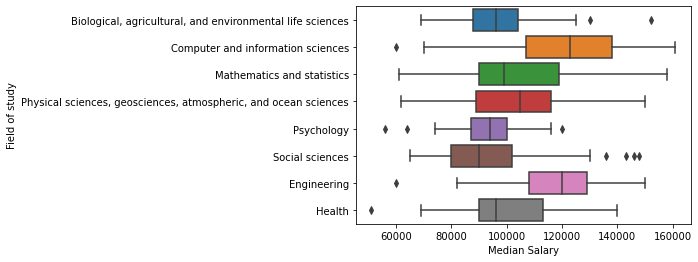

In [11]:
sns.boxplot(data = location2, orient = 'h').set(xlabel='Median Salary')

In [12]:
location2 = location2.T
location2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Biological, agricultural, and environmental life sciences to Health
Data columns (total 77 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Computer applications                 8 non-null      float64
 1   Management, sales, or administration  8 non-null      float64
 2   Professional services                 8 non-null      float64
 3   Any R&D                               8 non-null      float64
 4   Teaching                              8 non-null      float64
 5   Other Activity                        8 non-null      float64
 6   4-year educational institution        8 non-null      float64
 7   Other educational institution         8 non-null      float64
 8   Private, for profit                   8 non-null      float64
 9   Private, nonprofit                    8 non-null      float64
 10  Federal government                

In [13]:
smallTable = location2.iloc[:, 0:14]
smallTable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Biological, agricultural, and environmental life sciences to Health
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Computer applications                 8 non-null      float64
 1   Management, sales, or administration  8 non-null      float64
 2   Professional services                 8 non-null      float64
 3   Any R&D                               8 non-null      float64
 4   Teaching                              8 non-null      float64
 5   Other Activity                        8 non-null      float64
 6   4-year educational institution        8 non-null      float64
 7   Other educational institution         8 non-null      float64
 8   Private, for profit                   8 non-null      float64
 9   Private, nonprofit                    8 non-null      float64
 10  Federal government                

[Text(0.5, 0, 'Median Salary')]

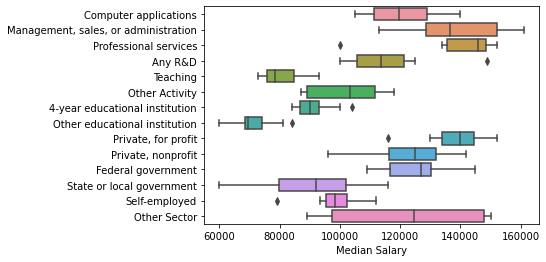

In [14]:
sns.boxplot(data = smallTable, orient = 'h').set(xlabel='Median Salary')

Looking at boxplots, it appears that the Job Title and Job Sector have more of an effect on salary than Degree

In [15]:
statesOnly = location2.iloc[:, 15:]

In [16]:
statesOnly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Biological, agricultural, and environmental life sciences to Health
Data columns (total 62 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   New England                       8 non-null      float64
 1   Connecticut                       8 non-null      float64
 2   Maine                             8 non-null      float64
 3   Massachusetts                     8 non-null      float64
 4   New Hampshire                     8 non-null      float64
 5   Rhode Island                      8 non-null      float64
 6   Vermont                           8 non-null      float64
 7   Middle Atlantic                   8 non-null      float64
 8   New Jersey                        8 non-null      float64
 9   New York                          8 non-null      float64
 10  Pennsylvania                      8 non-null      float64
 11  East North Central 

[Text(0.5, 0, 'Median Salary')]

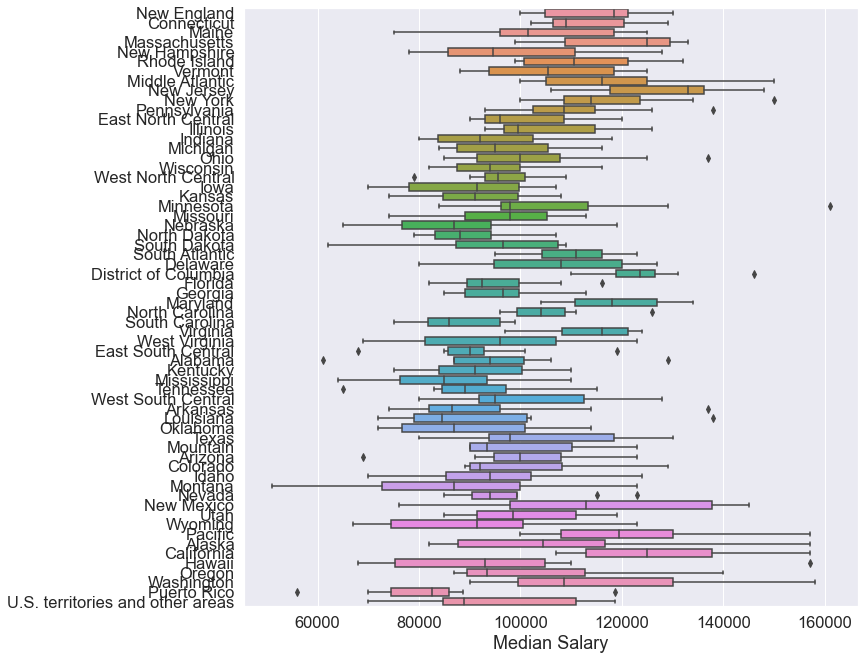

In [17]:
sns.set(rc={'figure.figsize':(11,11)}, font_scale=1.5)
sns.boxplot(data = statesOnly, orient = 'h').set(xlabel='Median Salary')

In [18]:
smallDegs = smallTable.T

In [19]:
smallDegs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Computer applications to Other Sector
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Biological, agricultural, and environmental life sciences        14 non-null     float64
 1   Computer and information sciences                                14 non-null     float64
 2   Mathematics and statistics                                       14 non-null     float64
 3   Physical sciences, geosciences, atmospheric, and ocean sciences  14 non-null     float64
 4   Psychology                                                       14 non-null     float64
 5   Social sciences                                                  14 non-null     float64
 6   Engineering                                                      14 non-null     float64
 7   Health                

In [20]:
smallDegs.head(3)

Field of study,"Biological, agricultural, and environmental life sciences",Computer and information sciences,Mathematics and statistics,"Physical sciences, geosciences, atmospheric, and ocean sciences",Psychology,Social sciences,Engineering,Health
Computer applications,105000.0,140000.0,129000.0,125000.0,109000.0,114000.0,129000.0,112000.0
"Management, sales, or administration",125000.0,161000.0,158000.0,140000.0,113000.0,130000.0,150000.0,133000.0
Professional services,152000.0,147000.0,145000.0,150000.0,100000.0,136000.0,148000.0,134000.0


<AxesSubplot:xlabel='Biological, agricultural, and environmental life sciences', ylabel='Count'>

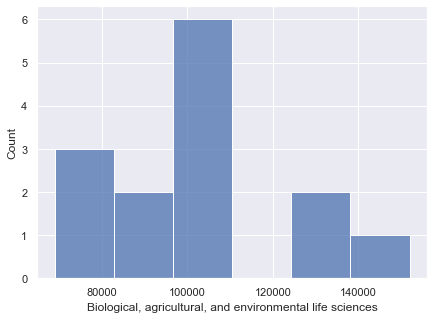

In [21]:
sns.set(rc={'figure.figsize':(7,5)}, font_scale=1)
sns.histplot(smallDegs['Biological, agricultural, and environmental life sciences'], bins = 6)

The loop below compares the Life Science Median Salaries as a group to each other degree in turn.

In [22]:
for i in smallDegs.columns:
    t1 = scs.ttest_ind(smallDegs['Biological, agricultural, and environmental life sciences'], smallDegs[i])
    print(i,'P-value =', t1.pvalue)

Biological, agricultural, and environmental life sciences P-value = 1.0
Computer and information sciences P-value = 0.04757626133644643
Mathematics and statistics P-value = 0.13766971031132028
Physical sciences, geosciences, atmospheric, and ocean sciences P-value = 0.2634157630106853
Psychology P-value = 0.6517484592691767
Social sciences P-value = 0.3732210215351838
Engineering P-value = 0.0853719463607506
Health P-value = 0.29311256924738327


## Initial results
Initial results indicate that there is a statistically significant difference in mean median salary between Life Sciences and Computer Science. There is not necessarily this difference between Life Science and the other degrees, though Engineering may be worth looking at more closely.